<a href="https://colab.research.google.com/github/professor91/Crypto-Trading-Strategy/blob/master/hangman/Hangman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hangman

Hangman is a popular word-guessing game where one person thinks of a word and the other person tries to guess it by suggesting letters. The word is represented by a series of blanks, with each blank representing a letter in the word.

The person guessing the word has a limited number of attempts and have to guess the word correctly within those attempts. Each incorrect guess results in loosing a life. If the person guessing can complete the word before all the lives are exhausted they win otherwise loose.

The number of attempts typically varies, for this algorithm we have given 6 incorrect guesses (lives).

In [ ]:
import random
import re
from collections import defaultdict
import math

import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class Hangman(object):
  def __init__(self, num_of_tries= 6):
    self.tries_remains = num_of_tries
    full_dictionary_location = "/content/drive/MyDrive/Hangman/words_250000_train.txt"
    self.full_dictionary, self.test_data = train_test_split(self.build_dictionary(full_dictionary_location), test_size=0.3)

    self.guessed_letters = set()

    self.current_dictionary = self.full_dictionary

  def build_dictionary(self, dictionary_file_location):
    text_file = open(dictionary_file_location,"r")
    full_dictionary = text_file.read().splitlines()
    text_file.close()
    return full_dictionary


  def guess(self, word, verbose=False): # word input example: "_ p p _ e "
    if verbose:
      print('\nGuessing Letter')
    clean_word = word[::2].replace("_",".")
    len_word = len(clean_word)

    known_letters = set(character for character in clean_word if character.isalpha())

    # current possible words
    new_dictionary = []

    if not known_letters:
      if verbose:
        print('No Known letters')
      self.current_dictionary = self.full_dictionary
    else:
      wrong_guesses = set(known_letters-self.guessed_letters)
      self.current_dictionary = [dict_word for dict_word in self.current_dictionary if re.match(clean_word, dict_word) and not wrong_guesses.intersection(dict_word)]
      if verbose:
        print('# of possible words: {0}'.format(len(self.current_dictionary)))

    # frequency table of letters
    possible_letters_list = []

    if len(self.current_dictionary) > 10:
      if verbose:
        print('Deploying Conditional Probabilito')
      letter_counts = defaultdict(int)

      for word in self.current_dictionary:
        unique_letters = set(word)
        for letter in unique_letters:
          if letter not in self.guessed_letters:
            letter_counts[letter] += 1

      possible_letters_list = sorted(letter_counts.items(), key= lambda v: v[1], reverse=True)

      # information = {letter: math.log2(1/frequency) for letter,frequency in letter_counts.items()}
      # possible_letters_list = sorted(information.items(), key= lambda v: v[1], reverse=False)

    else:
      if verbose:
        print('Deploying Associative Relationo')
      pairs = set()

      for i, char in enumerate(clean_word):
        if char == '.':
          if i-1 < 0:
            if clean_word[i+1].isalpha():
              pairs.add(char+clean_word[i+1])
          elif i == len_word-1:
            if clean_word[i-1].isalpha():
              pairs.add(clean_word[i-1]+char)
          else:
            if clean_word[i-1].isalpha():
              pairs.add(clean_word[i-1]+char)
            if clean_word[i+1].isalpha():
              pairs.add(char+clean_word[i+1])

      if verbose:
        print('association patterns: ', pairs)

      letter_counts = defaultdict(int)

      for word in self.full_dictionary:
        for pattern in pairs:
          l = re.findall(pattern, word)
          for i in l:
            letter = i.replace(pattern.replace('.', ''), '')
            if letter not in self.guessed_letters:
              letter_counts[letter] += 1

      possible_letters_list = sorted(letter_counts.items(), key= lambda v: v[1], reverse=True)

    if verbose:
      print('possible letters list: {0}'.format(possible_letters_list))

    # guess letter
    guess_letter = '!'

    for letter,count in possible_letters_list:
      if letter not in self.guessed_letters:
          guess_letter = letter
          break

    # if upper both exhausted
    if guess_letter == '!':
      if verbose:
        print('Deploying Fallback Strategy')
      for letter,count in self.full_dictionary_common_letter_sorted:
        if letter not in self.guessed_letters:
          guess_letter = letter
          break

    return guess_letter


  def start_game(self, verbose=True, word = None):
    # reset guessed letters to empty set and current plausible dictionary to the full dictionary
    self.guessed_letters = set()
    self.current_dictionary = self.full_dictionary

    if not word:
      word = random.choice(self.test_data)
    hidden_word = ' '.join(['_' for letter in word])

    tries_remains = self.tries_remains

    if verbose:
      print('Starting a new game with word: {0}'.format(word))
      print("# of tries remaining: {0}. Word: {1}.\n".format(tries_remains, hidden_word))

    while tries_remains>0:
      guess_letter = self.guess(hidden_word, verbose)
      self.guessed_letters.add(guess_letter)

      if verbose:
        print("Guessed letter: {0}".format(guess_letter))

      if guess_letter in word:
        indices = [index for index, letter in enumerate(word) if letter == guess_letter]
        for index in indices:
          hidden_word = hidden_word[:index*2] + guess_letter + hidden_word[index*2+1:]
        if verbose:
          print('Correct Guess. Word: {0}\n'.format(hidden_word))
      else:
        tries_remains -= 1
        if verbose:
          print('Wrong Guess. # of tries remaining: {0}\n'.format(tries_remains))

      if '_' not in hidden_word:
        if verbose:
          print("Successfully finished game")
        return True

    if tries_remains == 0:
      if verbose:
        print("Failed game because of: # of tries exceeded!")
      return False

In [ ]:
game = Hangman(num_of_tries=6)

In [ ]:
game.start_game(word='sunshine')

Starting a new game with word: sunshine
# of tries remaining: 6. Word: _ _ _ _ _ _ _ _.


Guessing Letter
No Known letters
Deploying Conditional Probabilito
possible letters list: [('e', 108192), ('i', 94209), ('a', 93698), ('r', 84381), ('n', 80514), ('o', 77962), ('s', 77172), ('t', 76028), ('l', 67960), ('c', 53014), ('u', 47427), ('d', 45500), ('p', 39962), ('m', 38784), ('h', 36588), ('g', 32776), ('y', 27076), ('b', 25776), ('f', 16469), ('v', 14140), ('k', 12402), ('w', 11754), ('z', 5789), ('x', 4216), ('q', 2784), ('j', 2617)]
Guessed letter: e
Correct Guess. Word: _ _ _ _ _ _ _ e


Guessing Letter
# of possible words: 13817
Deploying Conditional Probabilito
possible letters list: [('r', 7912), ('i', 7680), ('a', 7448), ('n', 7353), ('s', 7230), ('t', 6992), ('o', 6314), ('l', 6028), ('d', 5111), ('c', 4598), ('u', 3955), ('p', 3612), ('m', 3490), ('h', 2970), ('g', 2519), ('b', 2231), ('y', 1720), ('f', 1528), ('v', 1465), ('w', 1098), ('k', 1009), ('z', 504), ('x', 351), ('q

True

In [ ]:
count = 0

for i in range(100):
  print(i, end=' ')
  if game.start_game(verbose=False):
    count += 1
print('/n', count)
# 33

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 /n 21


# Misc

In [ ]:
directed_weighted_graph = defaultdict(lambda: defaultdict(lambda: [0,0]))

for word in game.full_dictionary:
  for i in range(len(word)-1):
    # pair in first half or second half of word
    if i < len(word)/2:
      directed_weighted_graph['first_'+word[i]]['second_'+word[i+1]][0] += 1
    else:
      directed_weighted_graph['first_'+word[i]]['second_'+word[i+1]][1] += 1


for key in directed_weighted_graph:
  directed_weighted_graph[key] = dict(sorted(directed_weighted_graph[key].items(), key=lambda v: v[0]))
directed_weighted_graph = dict(sorted(directed_weighted_graph.items(), key=lambda v: v[0]))
pd.DataFrame(directed_weighted_graph)

,first_a,first_b,first_c,first_d,first_e,first_f,first_g,first_h,first_i,first_j,...,first_q,first_r,first_s,first_t,first_u,first_v,first_w,first_x,first_y,first_z
second_a,"[25, 3]","[159, 23]","[176, 28]","[112, 53]","[125, 29]","[62, 10]","[124, 26]","[206, 34]","[66, 69]","[57, 8]",...,NaN,"[287, 78]","[145, 39]","[171, 74]","[44, 17]","[60, 21]","[104, 10]","[6, 0]","[65, 18]","[32, 16]"
second_b,"[102, 14]","[43, 3]","[1, 0]","[2, 0]","[40, 6]",NaN,NaN,"[1, 0]","[36, 3]","[1, 0]",...,"[1, 0]","[28, 4]","[9, 1]",NaN,"[47, 3]",NaN,"[1, 0]","[1, 0]","[7, 0]","[1, 0]"
second_c,"[131, 17]",NaN,"[35, 2]","[1, 2]","[70, 9]","[1, 0]",NaN,NaN,"[87, 62]",NaN,...,NaN,"[35, 0]","[77, 1]","[15, 0]","[63, 3]",NaN,"[2, 0]","[2, 0]","[12, 0]","[1, 1]"
second_d,"[132, 37]","[4, 0]","[3, 0]","[41, 3]","[82, 143]","[0, 1]","[1, 0]","[0, 1]","[95, 43]",NaN,...,NaN,"[44, 15]","[4, 0]","[0, 1]","[50, 12]",NaN,"[2, 1]","[1, 0]","[9, 3]","[2, 0]"
second_e,"[33, 19]","[153, 19]","[74, 44]","[162, 57]","[117, 52]","[50, 6]","[74, 60]","[163, 23]","[69, 100]","[33, 1]",...,"[1, 0]","[289, 75]","[146, 82]","[165, 74]","[30, 24]","[117, 47]","[79, 6]","[27, 1]","[43, 10]","[36, 18]"
second_f,"[38, 7]",NaN,"[1, 1]",NaN,"[25, 1]","[35, 24]","[1, 0]",NaN,"[33, 4]",NaN,...,NaN,"[9, 2]","[2, 0]","[1, 0]","[26, 3]",NaN,"[1, 0]",NaN,"[3, 0]",NaN
second_g,"[110, 7]","[1, 0]","[1, 0]","[27, 0]","[54, 6]","[1, 0]","[27, 3]",NaN,"[54, 10]",NaN,...,NaN,"[40, 1]","[2, 0]",NaN,"[39, 4]",NaN,"[2, 0]",NaN,"[2, 1]",NaN
second_h,"[45, 40]","[1, 0]","[149, 70]","[12, 2]","[18, 4]","[1, 0]","[17, 18]",NaN,"[13, 2]","[1, 0]",...,NaN,"[16, 2]","[135, 28]","[87, 42]","[5, 1]","[1, 0]","[42, 0]",NaN,"[1, 0]",NaN
second_i,"[137, 21]","[99, 19]","[52, 6]","[117, 23]","[80, 10]","[56, 5]","[61, 12]","[101, 19]","[8, 5]","[19, 6]",...,NaN,"[224, 37]","[103, 18]","[112, 25]","[44, 9]","[95, 5]","[66, 2]","[23, 2]","[8, 0]","[30, 2]"
second_j,"[12, 3]","[2, 0]",NaN,"[2, 0]","[6, 0]","[2, 0]",NaN,NaN,"[5, 1]","[1, 0]",...,NaN,"[2, 0]",NaN,NaN,"[5, 0]",NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Word Frequencies')

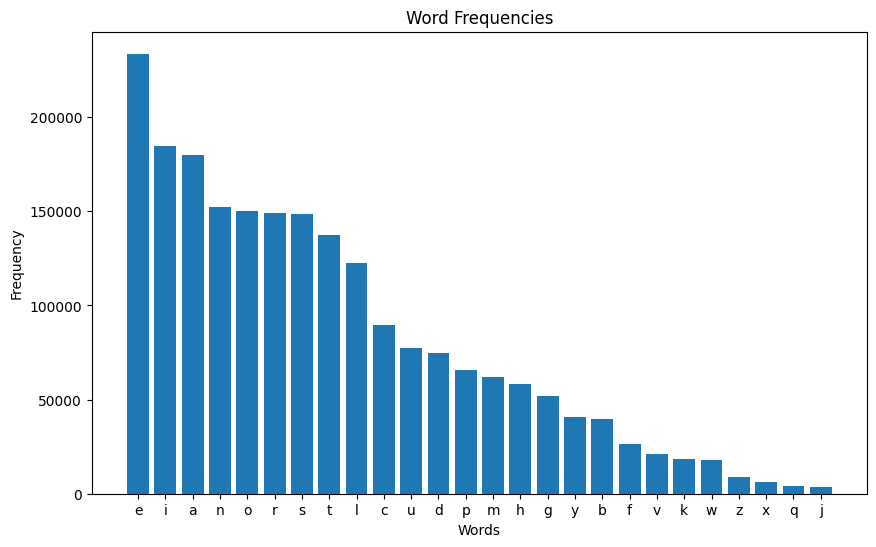

In [ ]:
# letter frequencies in dictionary

Text(0.5, 1.0, 'Word Frequencies')

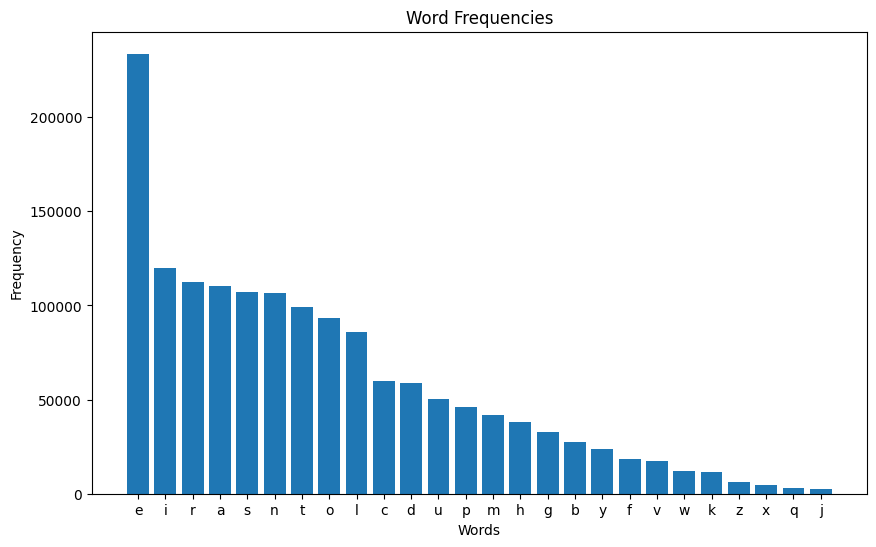

In [ ]:
words_d = [word for word in game.full_dictionary if 'e' in word]
letter_counts = collections.Counter("".join(words_d)).most_common()

words = [i[0] for i in letter_counts]
frequencies = [i[1] for i in letter_counts]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

In [ ]:
import math

In [ ]:
matrix = defaultdict(lambda: defaultdict(int))

for word in game.full_dictionary:
  for letter1 in set(word):
    for letter2 in set(word):
      if letter1 != letter2:
        matrix[letter1][letter2] += 1

In [ ]:
import string

In [ ]:
df = pd.DataFrame(matrix, index=list(string.ascii_lowercase), columns=list(string.ascii_lowercase))
df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,NaN,15941.0,33311.0,26337.0,60134.0,8308.0,19355.0,22150.0,54133.0,1508.0,...,1787.0,50788.0,42873.0,47471.0,24674.0,8023.0,5835.0,2453.0,15950.0,3726.0
b,15941.0,NaN,6791.0,7006.0,17704.0,1826.0,4320.0,4613.0,14147.0,397.0,...,293.0,13775.0,11384.0,10419.0,9240.0,1508.0,1641.0,492.0,4079.0,836.0
c,33311.0,6791.0,NaN,13220.0,35554.0,4403.0,7709.0,14433.0,34513.0,700.0,...,703.0,28410.0,24604.0,26903.0,16040.0,3972.0,1985.0,1221.0,9869.0,1364.0
d,26337.0,7006.0,13220.0,NaN,35347.0,4749.0,8053.0,9249.0,26875.0,633.0,...,656.0,24254.0,19748.0,18457.0,14096.0,3617.0,4535.0,989.0,6727.0,1580.0
e,60134.0,17704.0,35554.0,35347.0,NaN,11568.0,21018.0,23895.0,62416.0,1551.0,...,1962.0,62145.0,53862.0,54473.0,31072.0,11544.0,8183.0,3231.0,15773.0,4209.0
f,8308.0,1826.0,4403.0,4749.0,11568.0,NaN,2985.0,2727.0,9841.0,133.0,...,208.0,9459.0,7449.0,7243.0,5587.0,965.0,1273.0,336.0,2229.0,373.0
g,19355.0,4320.0,7709.0,8053.0,21018.0,2985.0,NaN,7465.0,23036.0,426.0,...,310.0,17555.0,13845.0,13932.0,9577.0,2393.0,2434.0,501.0,5565.0,1256.0
h,22150.0,4613.0,14433.0,9249.0,23895.0,2727.0,7465.0,NaN,21242.0,272.0,...,250.0,19140.0,18181.0,18324.0,8641.0,1486.0,3111.0,795.0,7688.0,1129.0
i,54133.0,14147.0,34513.0,26875.0,62416.0,9841.0,23036.0,21242.0,NaN,1279.0,...,1960.0,49632.0,47465.0,49101.0,25682.0,9823.0,5462.0,2715.0,15198.0,4385.0
j,1508.0,397.0,700.0,633.0,1551.0,133.0,426.0,272.0,1279.0,NaN,...,34.0,945.0,936.0,915.0,1032.0,178.0,137.0,33.0,346.0,73.0


<Axes: >

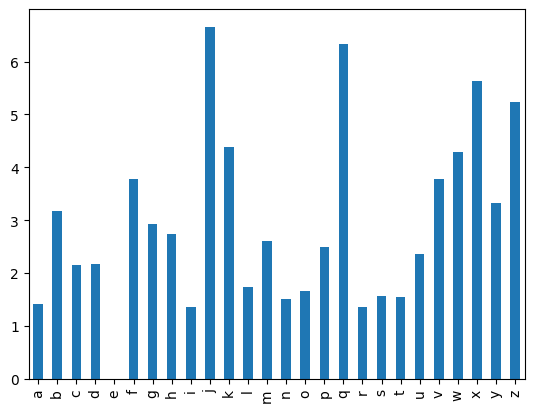

In [ ]:
df['e'].plot(kind='bar')

Text(0.5, 1.0, 'Word Frequencies')

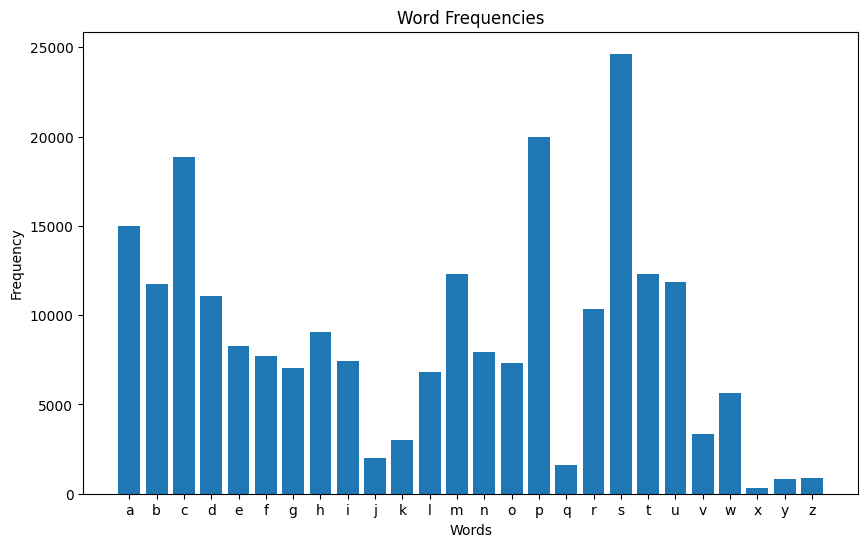

In [ ]:
# frequecy of words starting with each letter
l = defaultdict(int)
for word in game.full_dictionary:
  l[word[0]] += 1

words = [i[0] for i in l.items()]
frequencies = [i[1] for i in l.items()]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

In [ ]:
l = defaultdict(int)
count = 0
for word in game.full_dictionary:
    unique_letters = set(word)
    for letter in unique_letters:
        l[letter] += 1
        count += 1

information = {letter: -1*math.log2(1/frequency) for letter,frequency in l.items()}

l_sorted = sorted(l.items(), key= lambda v: v[1], reverse=False)
information_sorted = sorted(information.items(), key= lambda v: v[1], reverse=True)

Text(0.5, 1.0, 'Word Frequencies')

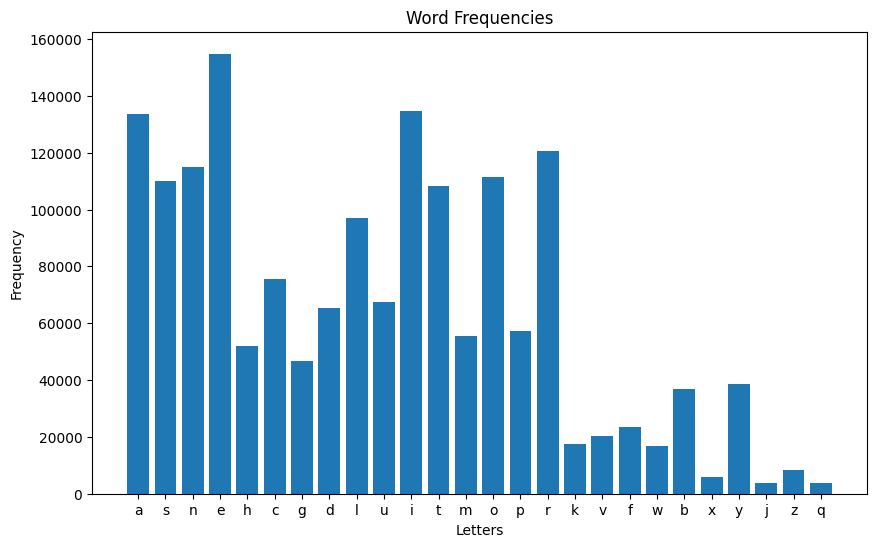

In [ ]:
letter = [i[0] for i in l.items()]
frequencies = [i[1] for i in l.items()]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(letter, frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

Text(0.5, 1.0, 'Word Frequencies')

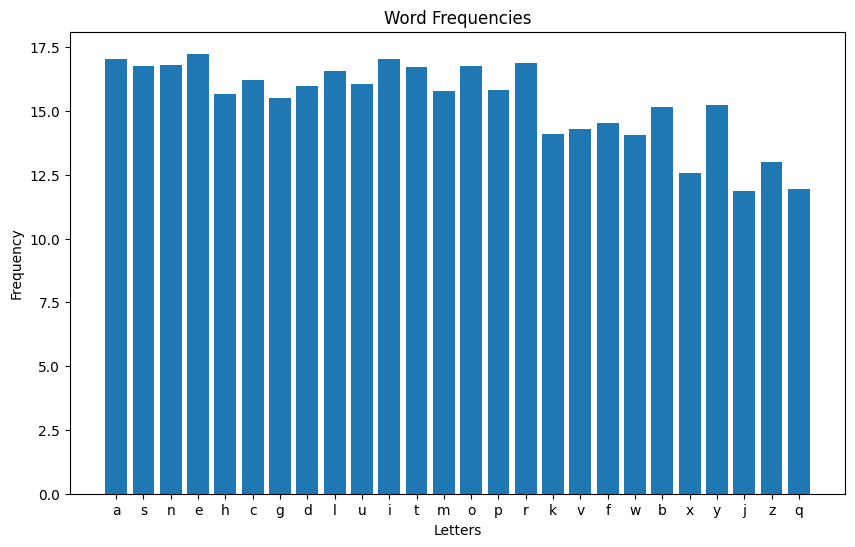

In [ ]:
# information theory
letter = [i[0] for i in information.items()]
frequencies = [i[1] for i in information.items()]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(letter, frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

Text(0.5, 1.0, 'Word Frequencies')

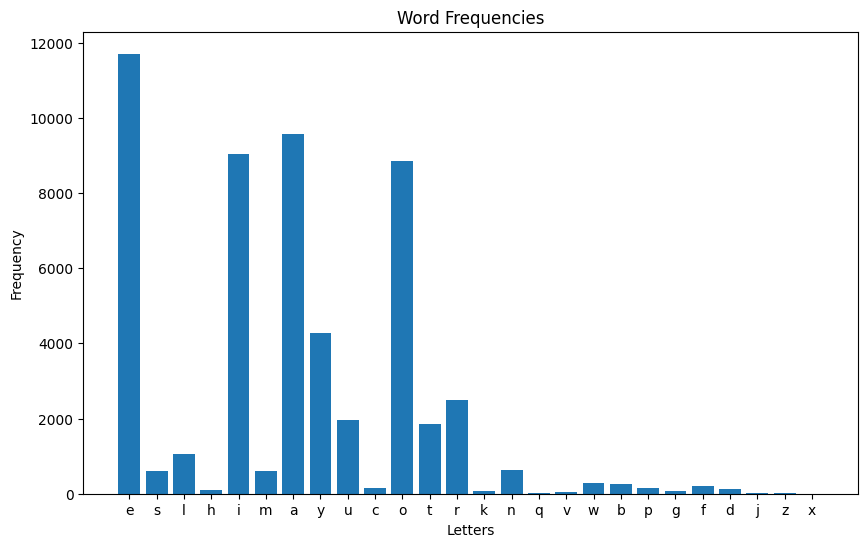

In [ ]:
# frequency given a letter
l = defaultdict(int)
count = 0
for word in game.full_dictionary:
    for i in range(0, len(word)-1):
      if word[i] == 'h':
        l[word[i+1]] += 1

letter = [i[0] for i in l.items()]
frequencies = [i[1] for i in l.items()]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(letter, frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

In [ ]:
x = [['Beautiful', 3],
['Happiness', 3],
['Friendship', 2],
['Chocolate', 3],
['Elephant', 3],
['Sunshine', 2],
['Butterfly', 3],
['Adventure', 3],
['Watermelon', 4],
['Fantastic', 3],]

x = [[i[0].lower(),i[1]] for i in x]
x

[['beautiful', 3],
 ['happiness', 3],
 ['friendship', 2],
 ['chocolate', 3],
 ['elephant', 3],
 ['sunshine', 2],
 ['butterfly', 3],
 ['adventure', 3],
 ['watermelon', 4],
 ['fantastic', 3]]

In [ ]:
vowel = ['a','e','i','o','u', 'y']

In [ ]:
for word,num in x:
  print(' '.join(['v' if letter in vowel else 'c' for letter in word]))

c v v v c v c v c
c v c c v c v c c
c c v v c c c c v c
c c v c v c v c v
v c v c c v c c
c v c c c v c v
c v c c v c c c c
v c c v c c v c v
c v c v c c v c v c
c v c c v c c v c


In [ ]:
'cvvv cv cvc'
'cv cv cvcc'
'ccvvccc cvc'
'ccv cv cv cv' #
'v cvc cvcc'
'cvcc cv cv' #
'cvc cvcc cv' #
'vc cvc cv cv' #
'cv cvc cv cvc' #
'cvc cvc cvc'#

In [ ]:
# for word,num in x:
#   count = 0
#   syll = []
#   x = []

#   for i,letter in enumerate(word):
#     if i == 0:
#       x.append(letter)
#       continue
#     if letter not in vowel:
#       if word[i+1] in vowel:

#     else:
#       x.append(letter)
#       continue

In [ ]:
# clean_word = "..rl..e..l i n g"
# len_word = len(clean_word)
# pairs = []
# i=0

# while i < len_word-1:
#   pattern = []
#   flag = True

#   while flag:
#     pattern.append(clean_word[i])
#     if clean_word[i] != clean_word[i+1]:
#       pattern.append(clean_word[i+1])
#       i += 1
#       flag = False
#     i += 1
#   pairs.append(pattern)
# pairs